# K-Means Clustering

In [2]:
import pandas as pd
from konlpy.tag import Mecab
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import numpy as np

In [3]:
mecab = Mecab()
Data = pd.read_csv('./Clustering_Sample_Data.csv', encoding='euc-kr')
# Portal News에 올라온 기사 중 '유한양행',' 라돈', '복면가왕 왕빔빵'으로 검색 키워드를 갖고 각 키워드당 5개 기사 추출
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [4]:
mylist = []

for i in Data['기사내용']:
    mylist.append(mecab.nouns(i))

for i in range(len(mylist)):
    mylist[i] = ' '.join(mylist[i])
mylist

['유한양행 얀센 바이오 테크 표적 항암 치료제 기술 계약 체결 일 공시 기술 수출 금액 억 만 달러 한 조 억 원 계약금 만 달러 개발 허가 매출 단계 마일스톤 억 만 달러 수령 예정 경상 기술료 매출액 책정 유한양행 관계자 기술 계약 수익 인식 임상시험 허가 등 성공 여부 수 미 실현 가능',
 '유한양행 조 억 원 규모 기술 계약 체결 소식 가격제 폭 일 오전 시 분 유한양행 전날 만 원 만 원 거래 사흘 연속 강세 유한양행 글로벌 제약사 존슨 앤 존슨 자회사 얀센 바이오 테크 저해제 레이저 티 프로젝트 기술 수출 계약 체결 이날 계약 규모 조 억 원 억 만 달러 반환 의무 계약금 억 원 만 달러 이번 계약 얀센 세계 레이저 티 개발 제조 상업 독점 권리 국내 개발 상업 권리 유한양행 유지 유한양행 얀센 바이오 텍 내년 레이저 티 단일 요법 병 요법 글로벌 임상 시험 공동 진행 예정 유한양행 개발 허가 상업 성공 단계 마일스톤 기술료 억 만 달러 조 억 원 수 임상시험 허가 상업 실패 경우 기술 계약 종료 경우 유한양행 얀센 측 지급 위약금',
 '유한양행 다국적 제약사 얀센 기술 수출 소식 주가 일 장 초반 상한가 유한양행 이날 오전 시 분 유가증권 시장 거래일 만 원 만 원 거래 유한양행 얀센 바이오 테크 상피세포 성장 인자 수용체 표적 항암 치료제 기술 이전 계약 체결 이날 장 개장 전 공시 이번 계약금 만 달러 개발 상업화 단계 기술료 마일스톤 억 만 달러 기술 수출 규모 억 만 달러 조 억 원 서근희 삼성증권 연구원 유한양행 이번 기술 수출 계약 소식 한미 약품 이후 기술 이전 계약 투자자 갈증 해소 전망 한미 약품 사노 피 기술 이전 계약 체결 이후 번 계약 규모 말',
 '유한양행 얀센 바이오 테크 상피세포 성장 인자 수용체 표적 항암 치료제 기술 계약 일 공시 기술 수출 금액 미화 억 천 만 달러 계약금 천만 달러 개발 허가 매출 단계 마일스톤 억 만 달러 수령 예정 계약 지역 한국 제외 세계',
 '유한양행 조 억 원 규모 기술 수출 소식

In [5]:
# 단어들을 이용하여 문서-단어 Matrix 생성
# 문서의 단어 빈도 기준
vec = CountVectorizer()
X = vec.fit_transform(mylist)
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df

,가격제,가능,가다,가동,가면,가수,가스,가왕,가요,가운데,...,확대,확인,확충,환경보호국,환경부,활동,효소,후기,후보,흡연
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
kmeans = KMeans(n_clusters=3).fit(df)
cluster = kmeans.predict(df)
print('cluster =', cluster)
kmeans.labels_  #K-Means 군집 분석 결과 3가지로 추출됨.
print('label_ =', kmeans.labels_)

cluster = [1 1 1 1 1 1 1 0 0 0 2 1 2 1 1]
label_ = [1 1 1 1 1 1 1 0 0 0 2 1 2 1 1]


In [7]:
#PCA 기법으로 차원을 2차원으로 줄인 후 군집 결과 시각화

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.index=Data['검색어']
principalDf

,principal component 1,principal component 2
검색어,,
유한양행,-2.310460,-5.977145
유한양행,-3.194006,-10.317752
유한양행,-2.895771,-8.911827
유한양행,-2.247359,-5.504302
유한양행,-3.247595,-10.398155
라돈,-4.733432,1.038843
라돈,-4.248666,0.019071
라돈,-9.264087,9.432610
라돈,-10.444923,11.907930


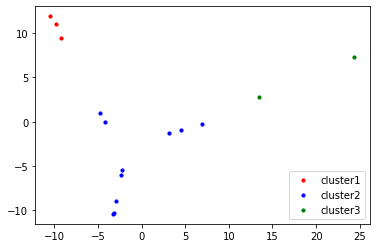

In [8]:
kmeans.labels_ == 0

# x축 : first
# y축 : second 번호로 나타낸후 plot으로 시각화
plt.scatter(principalDf.iloc[kmeans.labels_ == 0, 0], principalDf.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red', label = 'cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_ == 1, 0], principalDf.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')
plt.scatter(principalDf.iloc[kmeans.labels_ == 2, 0], principalDf.iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster3')
plt.legend()

In [9]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df, cluster)
print('Silhoutte Score =', score)

Silhoutte Score = 0.30860082697133395


# K-medoid Clustering

In [10]:
pip install pyclustering

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from konlpy.tag import Mecab
from sklearn.feature_extraction.text import CountVectorizer
from pyclustering.cluster import kmedoids
import numpy as np

In [12]:
mecab = Mecab()
Data = pd.read_csv('./Clustering_Sample_Data.csv', encoding='euc-kr')
# Portal News에 올라온 기사 중 '유한양행',' 라돈', '복면가왕 왕빔빵'으로 검색 키워드를 갖고 각 키워드당 5개 기사 추출
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [13]:
mylist = []

for i in Data['기사내용']:
    mylist.append(mecab.nouns(i))

for i in range(len(mylist)):
    mylist[i] = ' '.join(mylist[i])
mylist

['유한양행 얀센 바이오 테크 표적 항암 치료제 기술 계약 체결 일 공시 기술 수출 금액 억 만 달러 한 조 억 원 계약금 만 달러 개발 허가 매출 단계 마일스톤 억 만 달러 수령 예정 경상 기술료 매출액 책정 유한양행 관계자 기술 계약 수익 인식 임상시험 허가 등 성공 여부 수 미 실현 가능',
 '유한양행 조 억 원 규모 기술 계약 체결 소식 가격제 폭 일 오전 시 분 유한양행 전날 만 원 만 원 거래 사흘 연속 강세 유한양행 글로벌 제약사 존슨 앤 존슨 자회사 얀센 바이오 테크 저해제 레이저 티 프로젝트 기술 수출 계약 체결 이날 계약 규모 조 억 원 억 만 달러 반환 의무 계약금 억 원 만 달러 이번 계약 얀센 세계 레이저 티 개발 제조 상업 독점 권리 국내 개발 상업 권리 유한양행 유지 유한양행 얀센 바이오 텍 내년 레이저 티 단일 요법 병 요법 글로벌 임상 시험 공동 진행 예정 유한양행 개발 허가 상업 성공 단계 마일스톤 기술료 억 만 달러 조 억 원 수 임상시험 허가 상업 실패 경우 기술 계약 종료 경우 유한양행 얀센 측 지급 위약금',
 '유한양행 다국적 제약사 얀센 기술 수출 소식 주가 일 장 초반 상한가 유한양행 이날 오전 시 분 유가증권 시장 거래일 만 원 만 원 거래 유한양행 얀센 바이오 테크 상피세포 성장 인자 수용체 표적 항암 치료제 기술 이전 계약 체결 이날 장 개장 전 공시 이번 계약금 만 달러 개발 상업화 단계 기술료 마일스톤 억 만 달러 기술 수출 규모 억 만 달러 조 억 원 서근희 삼성증권 연구원 유한양행 이번 기술 수출 계약 소식 한미 약품 이후 기술 이전 계약 투자자 갈증 해소 전망 한미 약품 사노 피 기술 이전 계약 체결 이후 번 계약 규모 말',
 '유한양행 얀센 바이오 테크 상피세포 성장 인자 수용체 표적 항암 치료제 기술 계약 일 공시 기술 수출 금액 미화 억 천 만 달러 계약금 천만 달러 개발 허가 매출 단계 마일스톤 억 만 달러 수령 예정 계약 지역 한국 제외 세계',
 '유한양행 조 억 원 규모 기술 수출 소식

In [14]:
# 단어들을 이용하여 문서-단어 Matrix 생성
# 문서의 단어 빈도 기준
vec = CountVectorizer()
X = vec.fit_transform(mylist)
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df

,가격제,가능,가다,가동,가면,가수,가스,가왕,가요,가운데,...,확대,확인,확충,환경보호국,환경부,활동,효소,후기,후보,흡연
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
kmedoids_instance = kmedoids.kmedoids(df.values, initial_index_medoids=np.random.randint(15, size=3))
#0 ~ 14중 임의의 정수 3개

In [16]:
kmedoids_instance.process()

In [17]:
clusters = kmedoids_instance.get_clusters()
clusters

[[3, 0, 1, 2, 4, 5, 6, 10, 11, 12, 13, 14], [9, 8], [7]]

In [18]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.index=Data['검색어']
principalDf

,principal component 1,principal component 2
검색어,,
유한양행,-2.310460,-5.977145
유한양행,-3.194006,-10.317752
유한양행,-2.895771,-8.911827
유한양행,-2.247359,-5.504302
유한양행,-3.247595,-10.398155
라돈,-4.733432,1.038843
라돈,-4.248666,0.019071
라돈,-9.264087,9.432610
라돈,-10.444923,11.907930


In [19]:
results.medoids

NameError: name 'results' is not defined

In [1]:
# x축 : first
# y축 : second 번호로 나타낸후 plot으로 시각화
plt.scatter(principalDf.iloc[clusters == 0, 0], principalDf.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red', label = 'cluster1')
plt.scatter(principalDf.iloc[clusters == 1, 0], principalDf.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')
plt.scatter(principalDf.iloc[clusters == 2, 0], principalDf.iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster3')
plt.legend()

NameError: name 'plt' is not defined